# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(['int', 'float']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5]:
#your code here- categorical variable
titanic.select_dtypes(['object']).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

In [7]:
# your code here

bins = [0,10,20,30,40,50,60,70,80]
titanic['bins'] = pd.cut(titanic['Age'], bins)
a = titanic.groupby([titanic.bins,titanic.Gender], as_index=False).agg({'PassengerId':'count'})
male = a[a['Gender']=='male']
female = a[a['Gender']=='female']
print(male)

        bins Gender  PassengerId
1    (0, 10]   male           47
3   (10, 20]   male          103
5   (20, 30]   male          332
7   (30, 40]   male          181
9   (40, 50]   male          113
11  (50, 60]   male           40
13  (60, 70]   male           22
15  (70, 80]   male            5


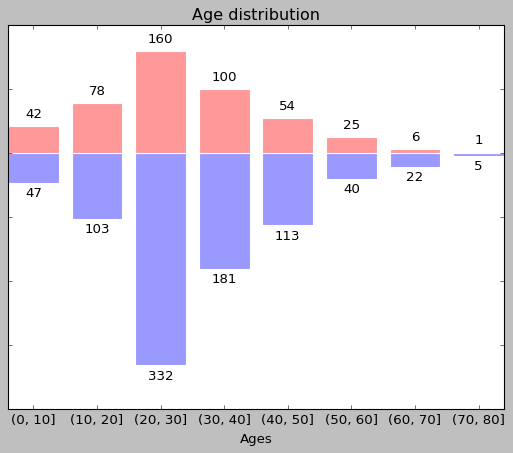

In [12]:
fig, ax = plt.subplots()
rects1= ax.bar(male['bins'].astype(str), -male['PassengerId'], facecolor='#9999ff', edgecolor='white')
rects2 = ax.bar(female['bins'].astype(str), female['PassengerId'], facecolor='#ff9999', edgecolor='white')
ax.set_xlabel('Ages')
ax.set_title('Age distribution')
ax.set_yticklabels([])


def autolabel(rects,n):
    for rect in rects:
        height = rect.get_height()
        if rect.get_height() < 0:
            ax.annotate('{}'.format(-height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, n),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        else:
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, n),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1,-15)
autolabel(rects2,5)

# Me encantaría pornerlo en horizontal pero no sé cómo darle la vuelta a las etitquetas :_____(

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

       bins Gender  PassengerId
1  (10, 20]   male          103
3  (20, 50]   male          626


[]

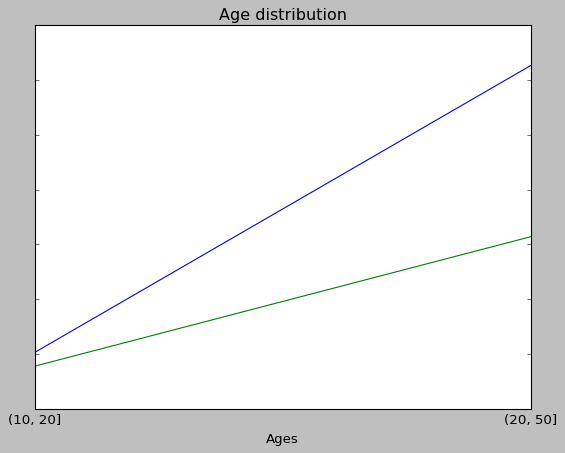

In [13]:
# your code here

bins = [10,20,50]
titanic['bins'] = pd.cut(titanic['Age'], bins)
a = titanic.groupby([titanic.bins,titanic.Gender], as_index=False).agg({'PassengerId':'count'})
male = a[a['Gender']=='male']
female = a[a['Gender']=='female']
print(male)

fig, ax = plt.subplots()
rects1= ax.plot(male['bins'].astype(str), male['PassengerId'])
rects2 = ax.plot(female['bins'].astype(str), female['PassengerId'])
ax.set_xlabel('Ages')
ax.set_title('Age distribution')
ax.set_yticklabels([])

#### Whether the bin size affects your plot? Why?

In [ ]:
#your comment here


#### Use seaborn to show the distribution of the column `Age`

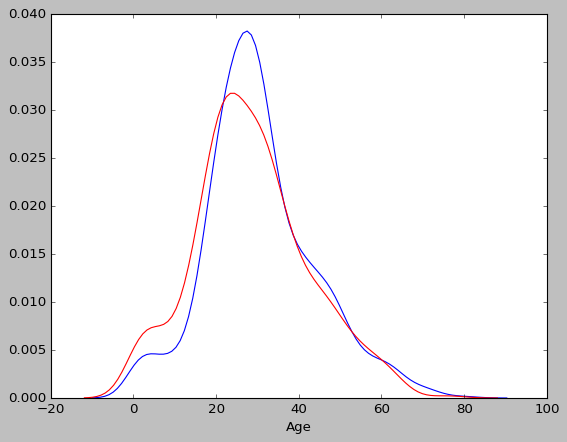

In [14]:
# your code here
male = titanic['Age'][titanic['Gender']=='male']
female = titanic['Age'][titanic['Gender']=='female']
sns.distplot(male,hist=False, color='b')
sns.distplot(female, hist=False, color='r')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

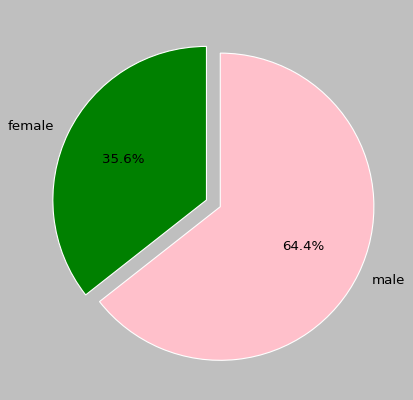

In [15]:
# your code here- 1st way
a = titanic.groupby([titanic.Gender], as_index=True).agg({'PassengerId':'count'})

plt.pie(a.PassengerId, explode = (0, 0.1),labels=a.index, autopct='%1.1f%%', 
        startangle=90, colors=('green','pink'), radius=1.0, wedgeprops=dict(width=1, edgecolor='w'))
# plt.rcParams['patch.edgecolor'] = 'white' 
plt.show()

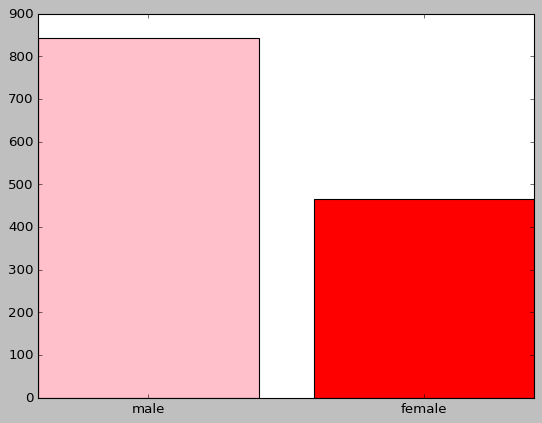

In [16]:
# your code here- 2nd way
a = titanic.groupby([titanic.Gender], as_index=True).agg({'PassengerId':'count'})
male = a.loc[['male']]
female = a.loc[['female']]
plt.bar(male.index, male.PassengerId, color='pink')
plt.bar(female.index, female.PassengerId, color='red')
plt.show()


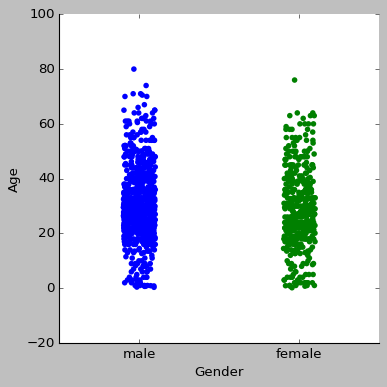

In [18]:
# import os, ssl
# if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
#     getattr(ssl, '_create_unverified_context', None)): 
#     ssl._create_default_https_context = ssl._create_unverified_context

sns.catplot(x='Gender',y='Age',data=titanic);

#### Use the appropriate plot to visualize the column `Pclass` 


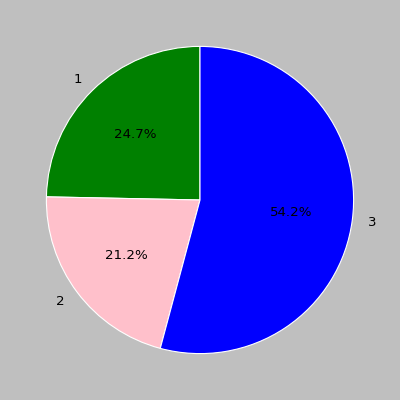

In [19]:
# your code here
# your code here- 1st way
a = titanic.groupby(titanic.Pclass, as_index=True).agg({'PassengerId':'count'})

plt.pie(a.PassengerId,labels=a.index, autopct='%1.1f%%', 
        startangle=90, colors=('green','pink','blue'), radius=1.0, wedgeprops=dict(width=1, edgecolor='w'))
# plt.rcParams['patch.edgecolor'] = 'white' 
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

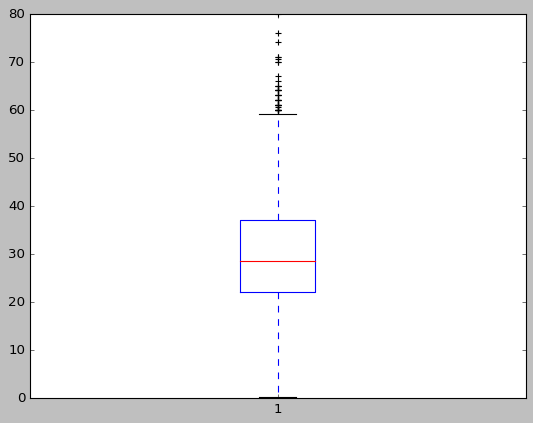

In [20]:
# your code here
plt.boxplot(titanic['Age'])
plt.show()

#### What does the previous plot tell you about the feature `Age`? Comment.

your comment here
La caja representa dónde están el 50% de los datos, entre 37 años y 22 años. La mediana es 28,5 años (línea roja), que es el valor que divide a los datos ordenados en dos partes iguales. 
Los bigotes representan el límite superior e inferior y todo lo que les sobrepase se consideran valores atípicos 

In [21]:
titanic['Age'].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [ ]:
#your code here
# ya está hecho más arriba

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

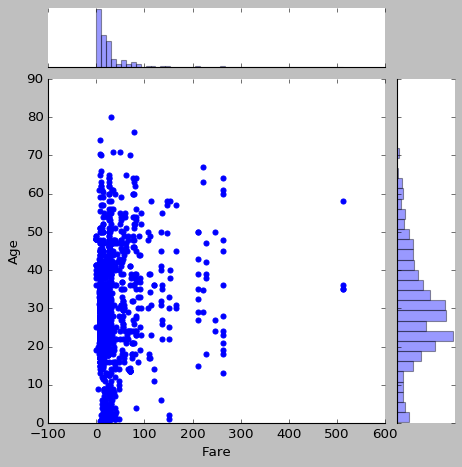

In [22]:
#your code-1st way
sns.jointplot(x='Fare',y='Age',data=titanic)

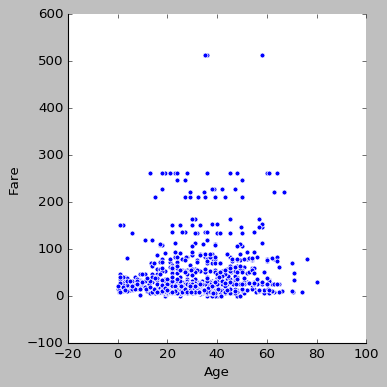

In [23]:
# your code-2nd way
sns.relplot(x='Age', y='Fare', data=titanic )

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


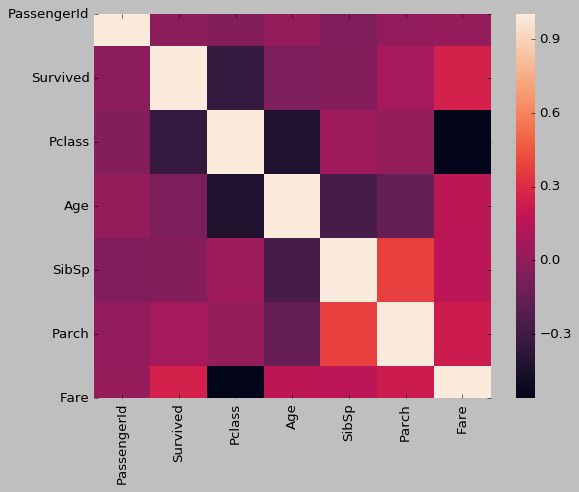

In [26]:
#your code here
display(titanic.corr())
sns.heatmap(titanic.corr())

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
# A más fare màs probabilidad de sobrevivir

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

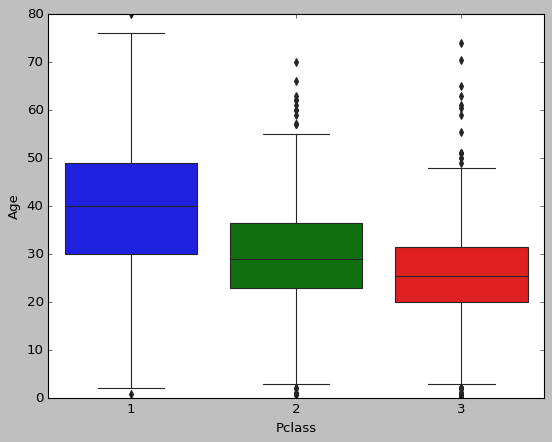

In [28]:
#your code here
sns.boxplot(x='Pclass',y='Age',data=titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

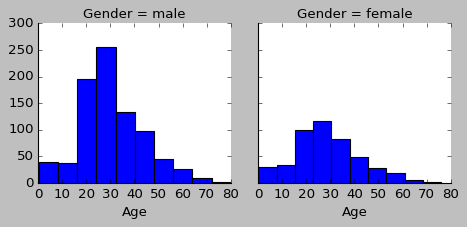

In [29]:
#your code here
g = sns.FacetGrid(data=titanic,col='Gender')
g.map(plt.hist,'Age')